# Jupyter Notebook for the problem of the 1st Chapter, Recursive Algorithm, of the course of "Algorithms for optimization inference and learning".

Physics of Complex Systems, Politecnico di Torino.





--------------------------------------------------------------------------------------------------------------
 
Chapter 1: recursion
 
--------------------------------------------------------------------------------------------------------------

In [7]:
#Header files needed

using Plots;
include("recursion.jl");

- Problem 3 (Sierpinski’s triangle)

Design a recursion to produce plot in Figure 1.1 (on the book).
(Hint: using a recursive function, produce vectors $p_x$, $p_y$ with respectively $x$ an $y$ coordinates of endpoints of your polygons using, separated by $NaN$ values. Then plot it.)





In [4]:
p_x, p_y = s_triangle(128)[1], s_triangle(128)[2];

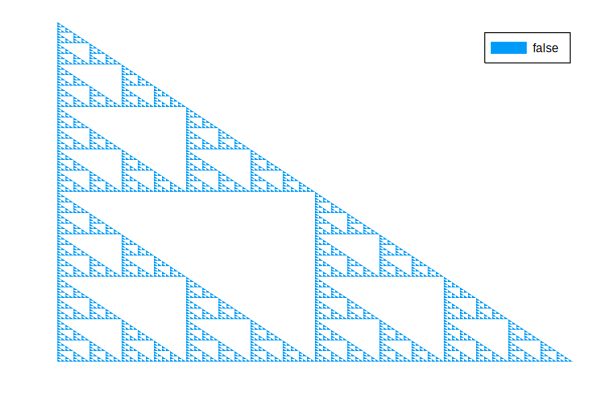

In [3]:
gr();
plot(p_x,p_y,seriestype=:shape,linewidth=-1,grid=false,axis=false,label=false)

In the solution that I've proposed, there is a problem related to the dimension of the triangle: it works well if the dimension $x$ is a power of 2, $x=2^n$, otherwise the algorithm doesn't work well. I know that the problem is in the part related to the recursive calls (I use to apply the recursive call to each part of dimension $\frac{x}{2}$, iterating the halving). I'll try to fix this.

- Problem 7 (In-place Quick Sort)

Design a recursive algorithm version (in-place) for the Quick Sort, in which arguments are the indices $(i,dim)$ into the original vector.

*Comments are shown in the source code.*

In [12]:
v = rand(1:100, 10)

10-element Array{Int64,1}:
 78
 97
 47
 49
 29
 64
 42
 41
 61
 63

In [13]:
qsort(v)

10-element Array{Int64,1}:
 29
 41
 42
 47
 49
 61
 63
 64
 78
 97